In [9]:
import typing

from cetsp.common import Circle
from cetsp.heuristics import find_cetsp_solution_via_2opttsp

In [10]:
instance = [
    Circle(0.5*x, 0.5*y, 1) for x in range(20) for y in range(20)
]

In [11]:
obj, tour = find_cetsp_solution_via_2opttsp(instance)

Building model.
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i7-8559U CPU @ 2.70GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1600 rows, 2800 columns and 4000 nonzeros
Model fingerprint: 0x7e2c0293
Model has 800 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-01, 1e+01]
  QRHS range       [1e+00, 1e+00]
Presolve removed 800 rows and 800 columns
Presolve time: 0.02s
Presolved: 1200 rows, 2400 columns, 2800 nonzeros
Presolved model has 800 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.600e+03
 Factor NZ  : 1.794e+04 (roughly 2 MB of memory)
 Factor Ops : 3.127e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal       

In [12]:
obj

63.089586449492295

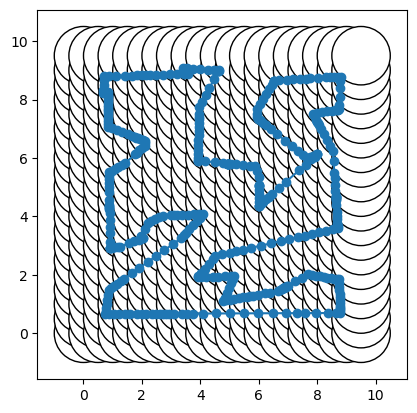

In [13]:
from cetsp.common import plot_circle
import matplotlib.pyplot as plt
fig = plt.Figure(figsize=(10,10))
ax = plt.gca()
for c in instance:
    plot_circle(ax, c, facecolor="white", zorder=1, ec="black")
plt.plot([p[0] for p in tour]+[tour[0][0]], [p[1] for p in tour]+[tour[0][1]], 'o-')
ax.set_aspect('equal', 'box')
plt.show()

In [14]:
from shapely.geometry import Point
from shapely.ops import unary_union

In [15]:
import typing
def instance_area(circles: typing.Iterable[Circle]):
    return unary_union([Point(c.x, c.y).buffer(c.radius) for c in circles]).area

In [16]:
(instance_area(instance)/Point(0,0).buffer(2).area-1)

9.437876735691335